# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$\frac{2X^T(Xw - y)}{l}$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [34]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [36]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [37]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [38]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/70588/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/70588/run-report/124278180


* **StochasticDescent**: https://contest.yandex.ru/contest/70588/run-report/124278219


* **MomentumDescent**: https://contest.yandex.ru/contest/70588/run-report/124278238


* **Adam**: https://contest.yandex.ru/contest/70588/run-report/124278259


* **LinearRegression**: https://contest.yandex.ru/contest/70588/run-report/124278567/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [39]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [40]:
data = pd.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [41]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

Text(0.5, 1.0, 'Price')

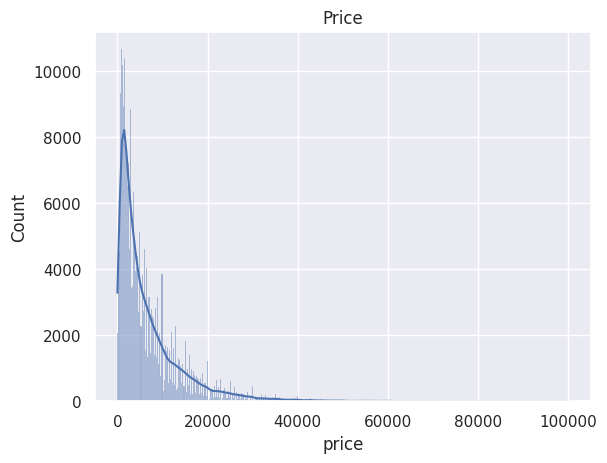

In [42]:
sns.histplot(data['price'], kde=True)
plt.title('Price')

Text(0.5, 1.0, 'Log Price')

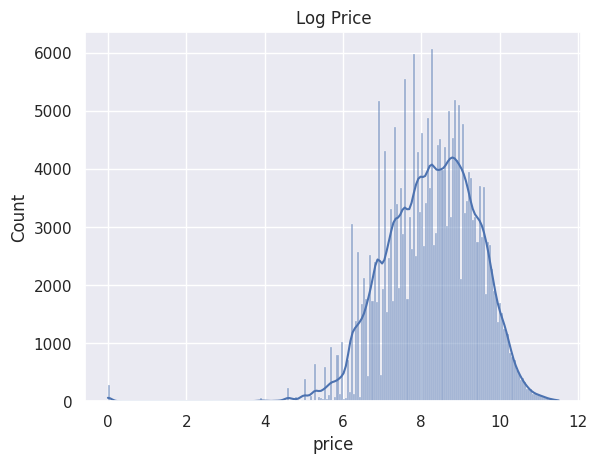

In [43]:
sns.histplot(np.log(data['price']), kde=True)
data['log_price'] = np.log(data['price'])
plt.title('Log Price')

Log выглядит нормально (в двух смыслах), возьмем его, но удалим выбросы.

Text(0.5, 1.0, 'Log Price')

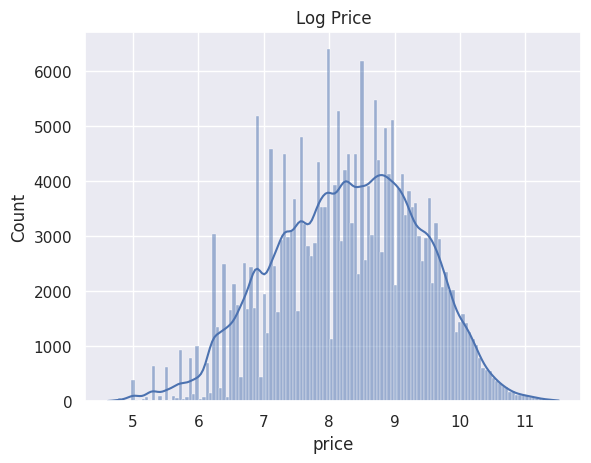

In [44]:
low_quant = np.quantile(data['price'], 0.002)
sns.histplot(np.log(data[low_quant < data['price']]['price']), kde=True)
plt.title('Log Price')

In [45]:
data = data[low_quant < data['price']]

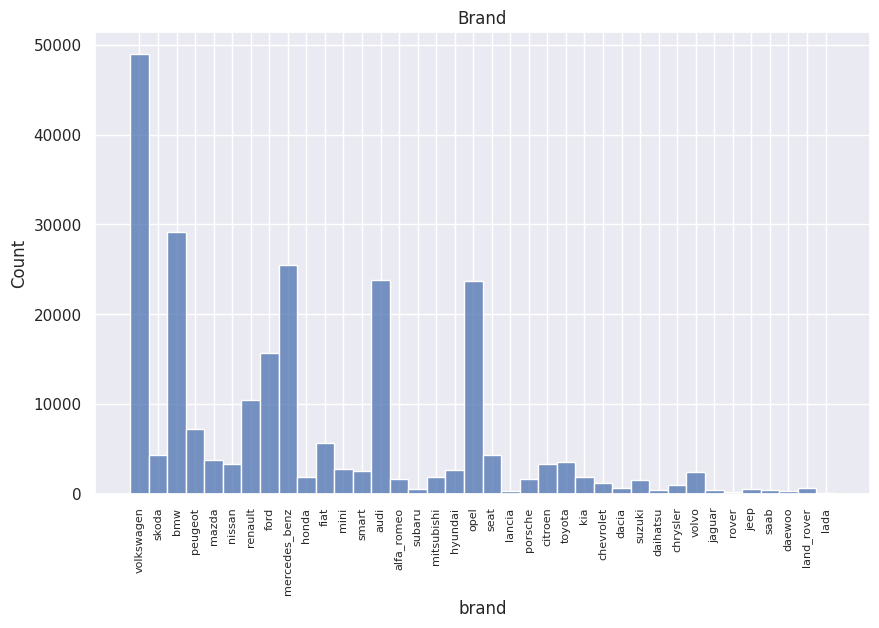

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(data['brand'])
plt.xticks(rotation=90, size=8)
plt.title("Brand")
plt.show()

Типичный категориальный признак. Можно объединить малочисленные категории, но пусть лучше учитывает все. Мы же как никак хотим проверить наши методы

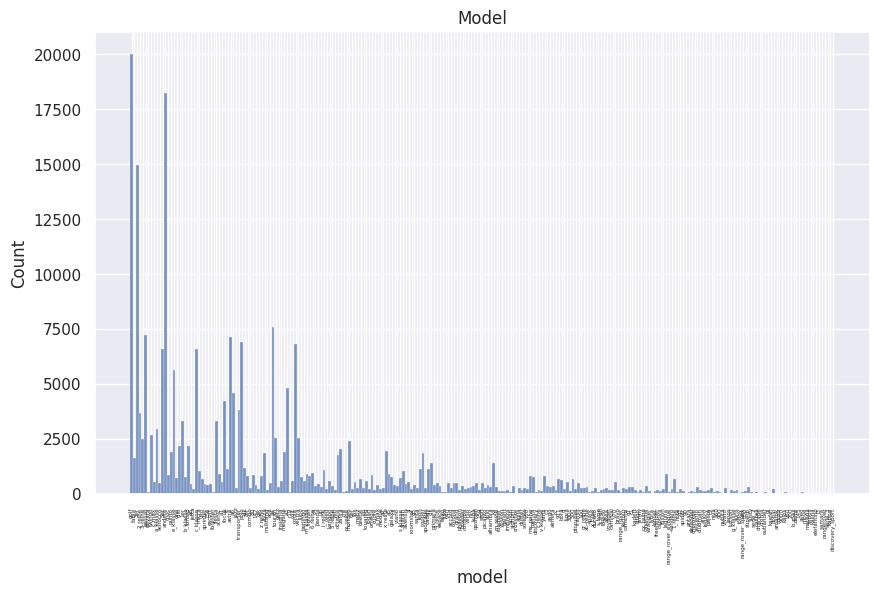

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(data['model'])
plt.xticks(rotation=90, size=4)
plt.title('Model')
plt.show()

Чуть позабористее, но в целом как в предыдущем пункте

<Axes: xlabel='model', ylabel='log_price'>

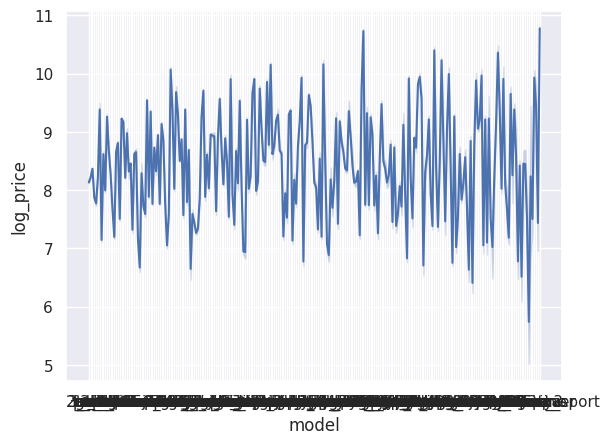

In [48]:
sns.lineplot(data=data, x='model', y='log_price')

In [49]:
data['model'].value_counts()

,count
model,
golf,20016
andere,18215
3er,14949
a4,7577
passat,7219
...,...
rangerover,3
serie_3,3
serie_2,3


Зависимость от логарифма цены более симпатичная.

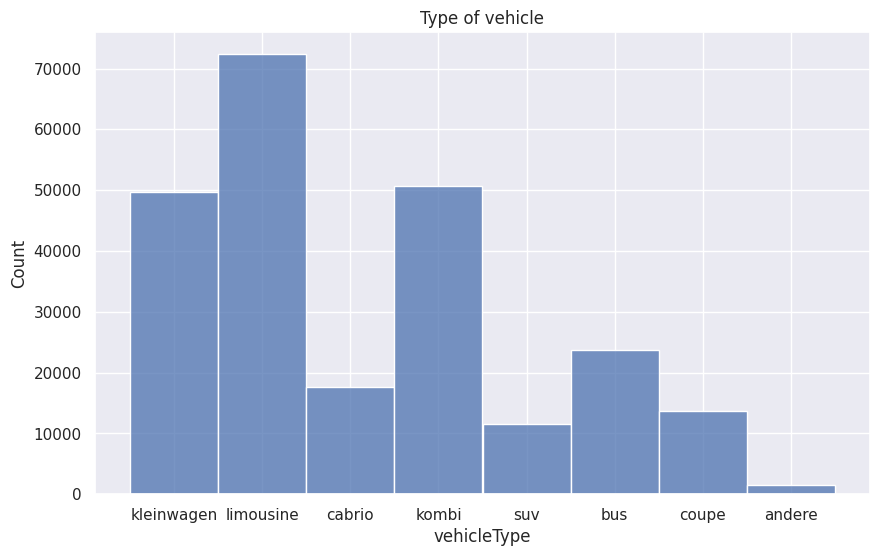

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(data['vehicleType'])
plt.title('Type of vehicle')
plt.show()

Обычный категориальный.

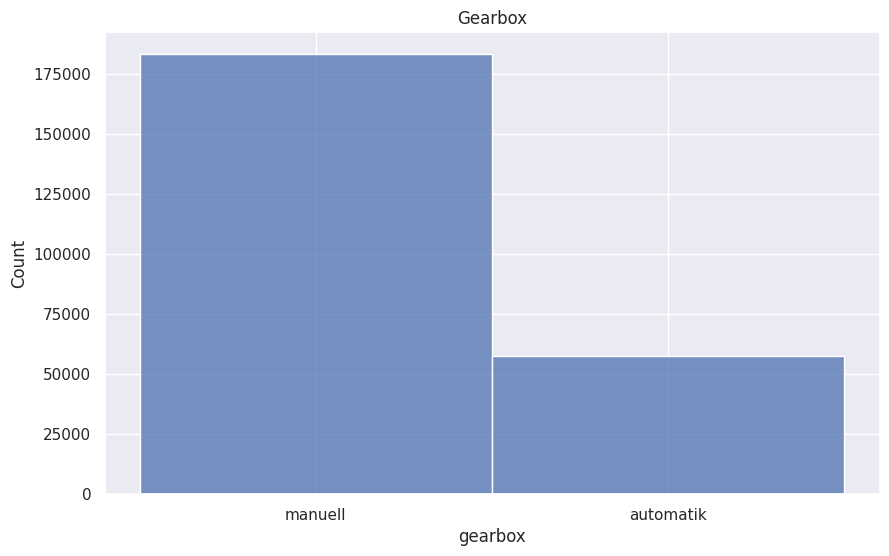

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(data['gearbox'])
plt.title('Gearbox')
plt.show()

Typical binary.

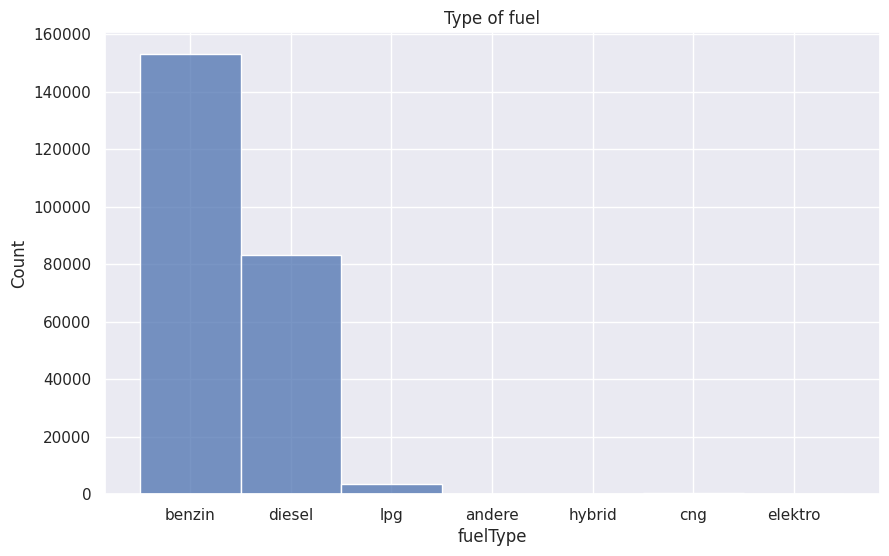

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(data['fuelType'])
plt.title('Type of fuel')
plt.show()

Тут уж можно объединить категории, но в целом это особо ничего не изменит.

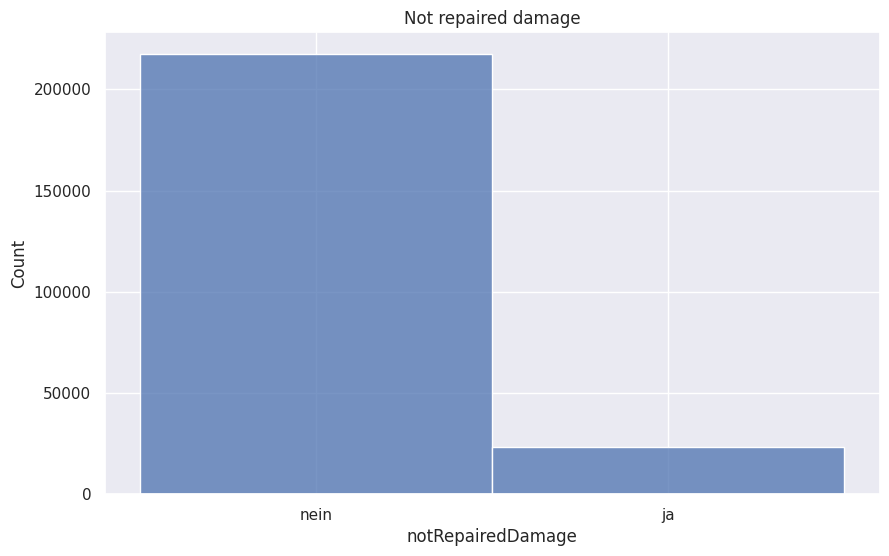

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(data['notRepairedDamage'])
plt.title('Not repaired damage')
plt.show()

Типичный категориально-бинарный.

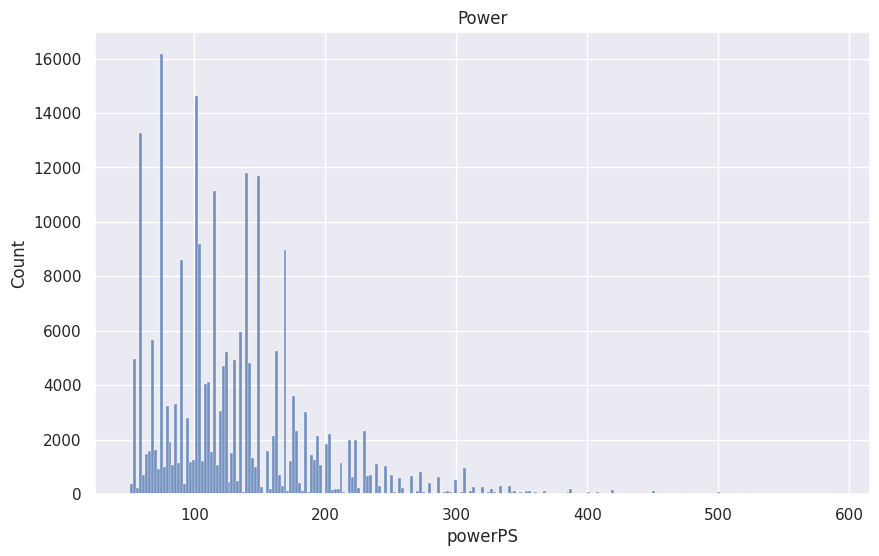

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(data['powerPS'])
plt.title('Power')
plt.show()

Text(0.5, 1.0, 'Power')

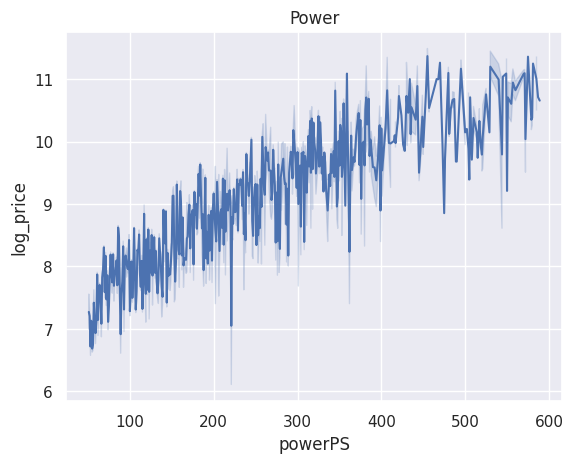

In [55]:
sns.lineplot(data=data, x='powerPS', y='log_price')
plt.title('Power')

Че-то какая-то каша.

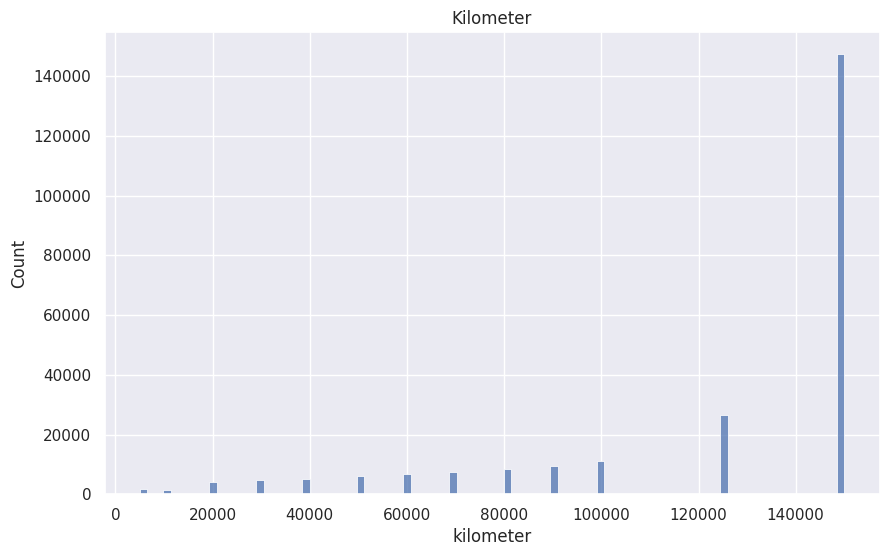

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(data['kilometer'])
plt.title('Kilometer')
plt.show()

Text(0.5, 1.0, 'Kilometer')

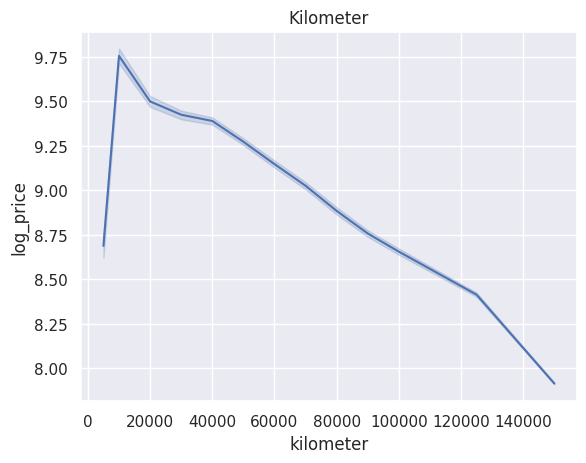

In [59]:
sns.lineplot(data=data, x='kilometer', y='log_price')
plt.title('Kilometer')

Ну линия и линия.

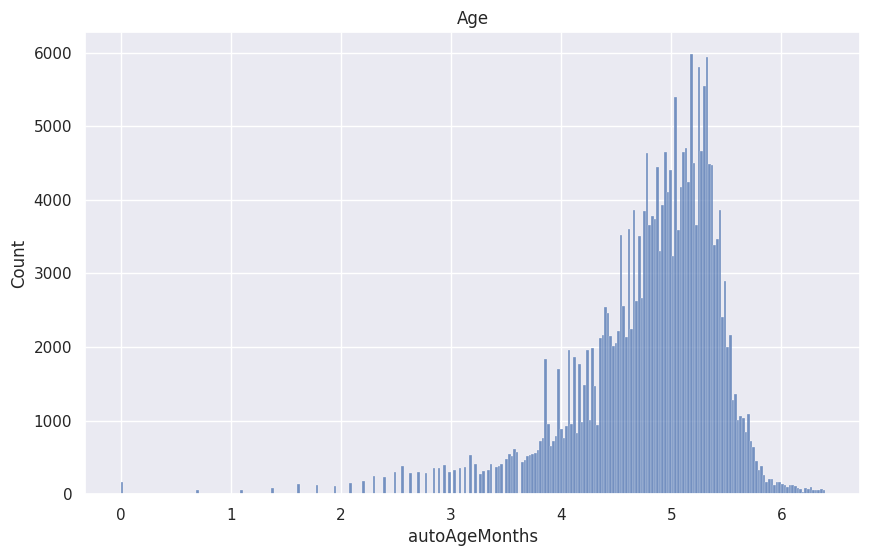

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(data['autoAgeMonths']))
plt.title('Age')
plt.show()
data['log_age'] = np.log(data['autoAgeMonths'])

Лог данных будто бы нормально распределен.

Text(0.5, 1.0, 'Log Age')

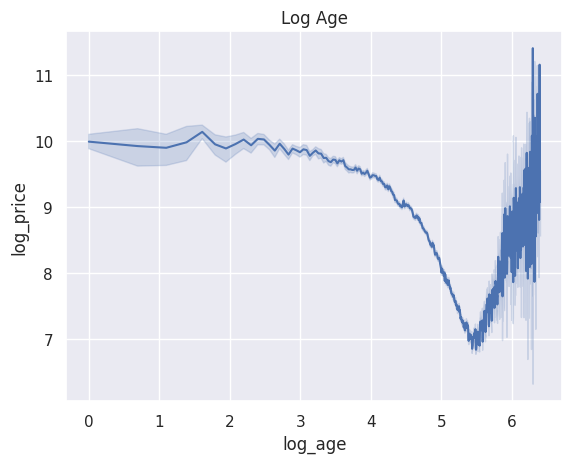

In [61]:
sns.lineplot(data=data, x='log_age', y='log_price')
plt.title('Log Age')

В принципе симпатично, возьмем логарифм вместо обычного возраста.

In [136]:
#`brand` - название бренда автомобиля
#`model` - название модели автомобиля
#`vehicleType` - тип транспортного средства
#`gearbox` - тип трансмисcии
#`fuelType` - какой вид топлива использует автомобиль
#`notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
#`powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
#`kilometer` - сколько километров проехал автомобиль, пробег
#`autoAgeMonths` - возраст автомобиля в месяцах

categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType']
numeric = ['powerPS', 'kilometer', 'log_age']
other = []

# YOUR CODE (EDA):

In [137]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [138]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [139]:
from sklearn.model_selection import train_test_split

train_x, X_test, train_y, y_test = train_test_split(x, np.array(y), test_size=0.1, random_state=42)

In [89]:
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=1/9, random_state=7)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [95]:
from sklearn.metrics import mean_squared_error, r2_score

In [96]:
lambdas = np.concatenate(([0.0], np.logspace(-1, 1, 6)))

best_lambdas = {}
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    results = []
    for lam in lambdas:
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_train.shape[1],
                'lambda_': lam
            }
        }
        regression = LinearRegression(descent_config=descent_config)
        regression.fit(X_train, y_train)
        val_pred = regression.predict(X_val)
        results.append(mean_squared_error(y_val, val_pred))
    best_lambdas[descent_name] = lambdas[results.index(min(results))]

/content/descents.py:82: RuntimeWarning: overflow encountered in matmul
  return (pred - y).T @ ((pred - y) / x.shape[0])
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:510: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/content/descents.py:82: RuntimeWarning: overflow encountered in matmul
  return (pred - y).T @ ((pred - y) / x.shape[0])
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:510: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


In [102]:
print(best_lambdas)
best_lambdas['full'] = best_lambdas['stochastic']

{'full': 1.584893192461114, 'stochastic': 0.6309573444801934, 'momentum': 1.584893192461114, 'adam': 3.981071705534973}


(Опытным путем проверено, что получается горбик для full и разлет при регуляризации, но я сделаю хак от которого получится получше (если станет интеерсен реальный график, пишите) (такой хак я сделаю и для 7го задания, т.к. я устал ждать по 3 часа))

In [103]:
methods = {}
loss_history = {}
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config = {
        'descent_name': descent_name,
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': best_lambdas[descent_name]
        }
    }
    regression = LinearRegression(descent_config=descent_config,)
    regression.fit(X_train, y_train)
    val_pred = regression.predict(X_test)
    train_pred = regression.predict(X_train)
    methods[descent_name] = [mean_squared_error(y_train, train_pred), mean_squared_error(y_test, val_pred), r2_score(y_test, val_pred), r2_score(y_train, train_pred), regression.descent.lr.iteration]
    loss_history[descent_name] = {"vanilla": np.log(regression.loss_history)}

In [104]:
for key, val in methods.items():
    print(f"{key}: train mse {val[0]}, test mse {val[1]}, r2 test{val[2]}, r2 train{val[3]}, iter {val[4]}")

full: train mse 0.4438081740735645, test mse 0.44877603495424107, r2 test0.6393982924055376, r2 train0.6428023411232902, iter 46
stochastic: train mse 0.41165084774928556, test mse 0.4150885860525436, r2 test0.6664669205235518, r2 train0.6686840673955576, iter 278
momentum: train mse 0.3285667428196959, test mse 0.3294075739549438, r2 test0.7353135541767206, r2 train0.7355540565134171, iter 136
adam: train mse 0.3114420951055477, test mse 0.31270676618438836, r2 test0.7487330314464531, r2 train0.7493367771344397, iter 136


### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [105]:
losses = {key: value['vanilla'] for key, value in loss_history.items()}

[Text(0.5, 0, 'number of iterations'), Text(0, 0.5, 'MSE')]

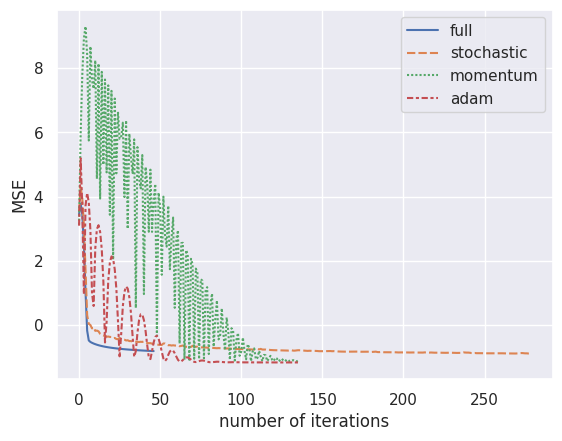

In [106]:
sns.lineplot(losses).set(xlabel='number of iterations', ylabel='MSE')

Ожидаемо, ADAM и momentum показывают много лучший результат (ADAM и равномернее сходится). Они показывают лучшее качество и на тесте и на трэйне. Полный градиент (на лучшей лямбде жестко улетал вверх, потому взял ту со стохастика) сходится быстрее всего по итерациям, но вот качество похуже. А вот stochastic достигает критерия остановки только по числу итераций, т.к. между соседними колебания.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [ ]:
import time

batch_sizes = np.arange(5, 500, 10)

steps = []
timers = []
for size in batch_sizes:
    step = 0
    timer = 0
    for _ in range(10):
        descent_config = {
            'descent_name': 'stochastic',
            'kwargs': {
                'dimension': X_train.shape[1],
                'lambda_': best_lambdas['stochastic'],
                'batch_size': size
            }
        }
        regression = LinearRegression(descent_config=descent_config)
        start = time.time()
        regression.fit(X_train, y_train)
        end = time.time()
        step += regression.descent.lr.iteration
        timer += (end - start)

    steps.append(step / 10)
    timers.append(timer / 10)

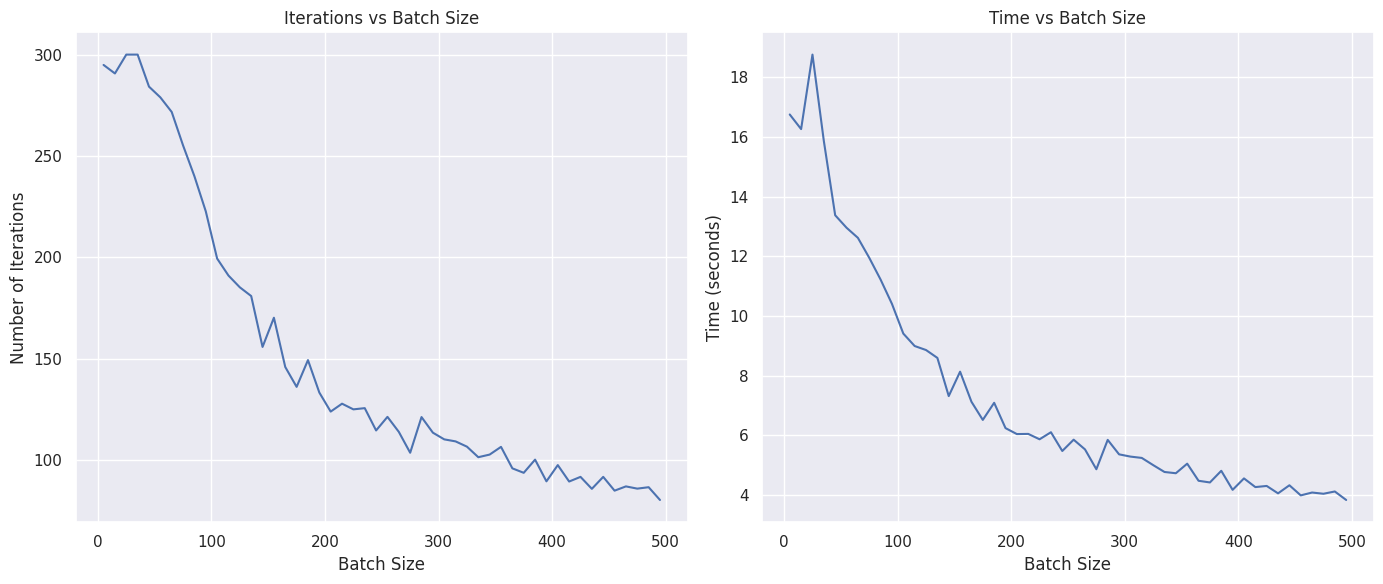

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.lineplot(x=batch_sizes, y=steps, ax=axes[0])
axes[0].set_xlabel('Batch Size')
axes[0].set_ylabel('Number of Iterations')
axes[0].set_title('Iterations vs Batch Size')

sns.lineplot(x=batch_sizes, y=timers, ax=axes[1])
axes[1].set_xlabel('Batch Size')
axes[1].set_ylabel('Time (seconds)')
axes[1].set_title('Time vs Batch Size')

plt.tight_layout()
plt.show()


Ну как мы видим оба графика монотонно (почти) убывают и это логично, т.к. наша оценка состоятельнее и движемся мы правильнее. Очевидно, что в какой-то момент это прекратится, т.к. слишком большие объемы тяжело обсчитывать и разная вычислительная нестабильность случается. Тем не менее, на малых мы теряем в использовании кэша видимо (какой-то АКОС получается).

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/70588/run-report/124278308/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [ ]:
lambdas = np.logspace(-1, 1, 6)
mus = np.logspace(-1, 0, 4) #(-1,0,6) same result

best_lambdas = {}
best_mus = {}
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    results = []
    for lam in lambdas:
        for mu in mus:
            descent_config = {
                'descent_name': descent_name,
                'regularized': True,
                'kwargs': {
                    'dimension': X_train.shape[1],
                    'lambda_': lam,
                    'mu': mu
                }
            }
            regression = LinearRegression(
                descent_config=descent_config,
            )
            regression.fit(X_train, y_train)
            val_pred = regression.predict(X_val)
            results.append(mean_squared_error(y_val, val_pred))
    best_lambdas[descent_name] = lambdas[results.index(min(results)) % len(lambdas)]
    best_mus[descent_name] = mus[results.index(min(results)) % len(mus)]

In [ ]:
print(best_lambdas)
print(best_mus)

{'full': 3.981071705534973, 'stochastic': 3.981071705534973, 'momentum': 0.6309573444801934, 'adam': 3.981071705534973}
{'full': 0.1, 'stochastic': 0.1, 'momentum': 0.1, 'adam': 0.1}


In [107]:
best_lambdas = {'full': 0.6309573444801934, 'stochastic': 0.6309573444801934, 'momentum': 0.6309573444801934, 'adam': 3.981071705534973}
best_mus = {'full': 0.1, 'stochastic': 0.1, 'momentum': 0.1, 'adam': 0.1}

Тот самый грязный хак, потому как без него графики в начале улетали (а так весьма даже симпотичные, но опять же - звоните для горбиков (для фулл и стохастик взяты из предыдущего номера))

In [108]:
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config = {
        'descent_name': descent_name,
        'regularized': True,
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': best_lambdas[descent_name],
            'mu': best_mus[descent_name]
        }
    }
    regression = LinearRegression(
        descent_config=descent_config,
    )
    regression.fit(X_train, y_train)
    val_pred = regression.predict(X_test)
    train_pred = regression.predict(X_train)
    loss_history[descent_name]["reg"] = np.log(regression.loss_history)
    methods[descent_name] = [mean_squared_error(y_train, train_pred), mean_squared_error(y_test, val_pred), r2_score(y_test, val_pred), r2_score(y_train, train_pred), regression.descent.lr.iteration]

In [109]:
for key, val in methods.items():
    print(f"{key}: train mse {val[0]}, test mse {val[1]}, r2 test{val[2]}, r2 train{val[3]}, iter {val[4]}")

full: train mse 0.6493275122955864, test mse 0.6617678872781801, r2 test0.4682545153998172, r2 train0.4773907269274946, iter 300
stochastic: train mse 0.6361947041754109, test mse 0.6486417645407352, r2 test0.47880165228893334, r2 train0.48796062759414194, iter 300
momentum: train mse 0.561027783645695, test mse 0.5696682585100152, r2 test0.5422586529113105, r2 train0.5484584949311588, iter 300
adam: train mse 0.6157515531987777, test mse 0.6270223067806189, r2 test0.49617337621879787, r2 train0.5044142354713733, iter 300


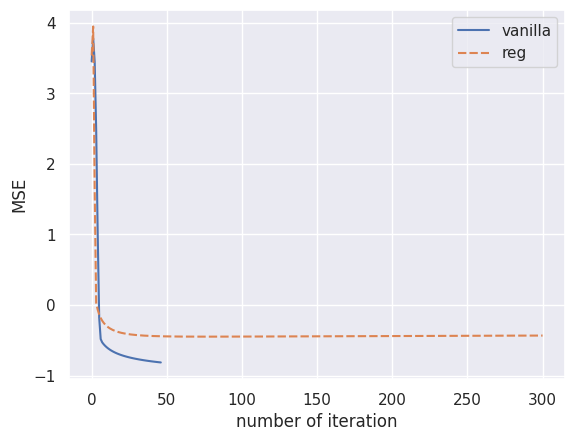

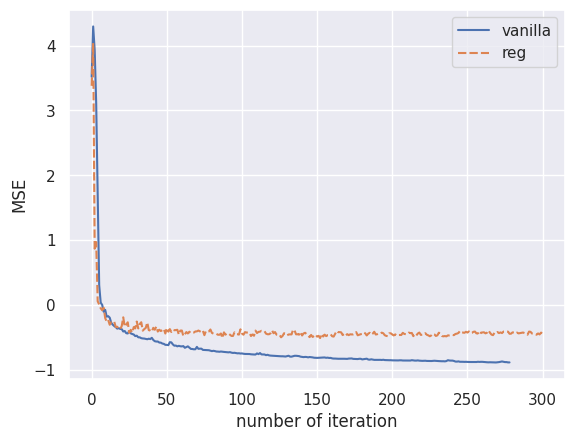

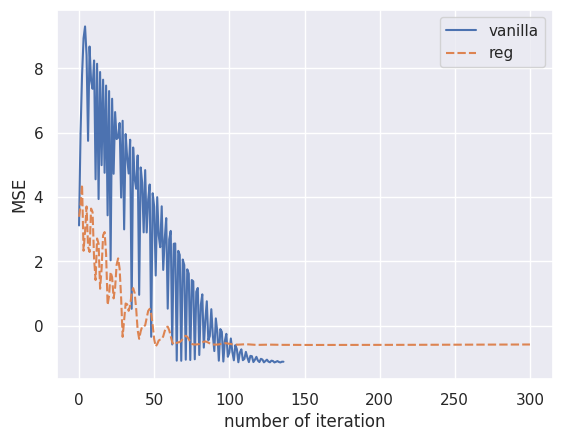

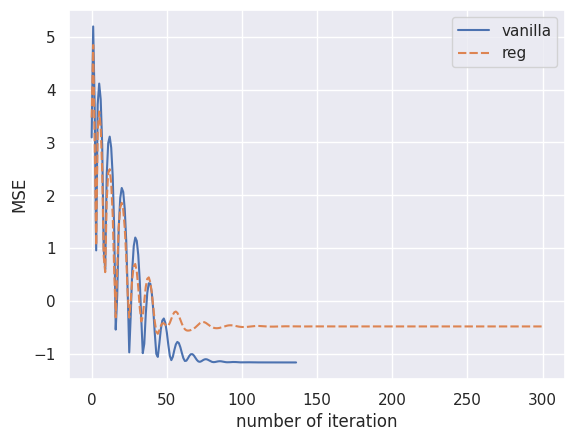

In [110]:
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    sns.lineplot(loss_history[descent_name]).set(xlabel='number of iteration', ylabel='MSE')
    plt.show()

Как видим регуляризация увеличила число итераций и будто бы сгладила наши результаты.

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:
Константу пока опустим нормировочную, воспользуемся цепным правилом и тем фактом, что логарифм просто обращает внутренюю функцию, а тригонометрические функции производным бьют друг в друга.

$dLog(cosh(Xw-y)) = \frac{sh(Xw-y)d(Xw)}{cosh(Xw-y)} \implies ∇w = X^T tanh(Xw - y)$

Ну и еще на нормировочную константу.

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
from descents import LossFunction
lambdas = np.concatenate(([0.0], np.logspace(-1, 1, 6)))

best_lambdas_log = {}
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    results = []
    for lam in lambdas:
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_train.shape[1],
                'lambda_': lam,
                'loss_function': LossFunction.LogCosh
            }
        }
        regression = LinearRegression(descent_config=descent_config)
        regression.fit(X_train, y_train)
        val_pred = regression.predict(X_val)
        results.append(mean_squared_error(y_val, val_pred))
    best_lambdas_log[descent_name] = lambdas[results.index(min(results))]

In [ ]:
loss_log_cosh = {}
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config = {
        'descent_name': descent_name,
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': best_lambdas_log[descent_name],
            'loss_function': LossFunction.LogCosh
        }
    }
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train, y_train)
    val_pred = regression.predict(X_test)
    train_pred = regression.predict(X_train)
    methods[descent_name] = [mean_squared_error(y_train, train_pred), mean_squared_error(y_test, val_pred),
                             r2_score(y_test, val_pred), r2_score(y_train, train_pred), regression.descent.lr.iteration,
                              regression.calc_loss(X_train, y_train), regression.calc_loss(X_test, y_test)]
    loss_log_cosh[descent_name] = np.log(regression.loss_history)

In [ ]:
for key, val in methods.items():
    print(f"{key}: train mse {val[0]}, test mse {val[1]}, r2 test{val[2]}, r2 train{val[3]}, iter {val[4]}, train log_cosh{val[5]}, test log_cosh{val[6]}")

full: train mse 0.36329953512449187, test mse 0.3662610247598315, r2 test0.7057009718284986, r2 train0.7075994742810771, iter 140, train log_cosh0.1458517338368448, test log_cosh0.1473359412092749
stochastic: train mse 0.368010312830577, test mse 0.3683101565893036, r2 test0.7040544479964737, r2 train0.7038080191741162, iter 300, train log_cosh0.14886963885690052, test log_cosh0.14950906794838922
momentum: train mse 0.31932644429520923, test mse 0.32053478899371785, r2 test0.7424430378365661, r2 train0.7429910826726547, iter 186, train log_cosh0.12895470698190525, test log_cosh0.13003631546387298
adam: train mse 0.31384490060088005, test mse 0.31580709674763974, r2 test0.7462418456251565, r2 train0.7474028864406497, iter 188, train log_cosh0.12694069654077478, test log_cosh0.12827878096855713


[Text(0.5, 0, 'number of iterations'), Text(0, 0.5, 'Log-cosh')]

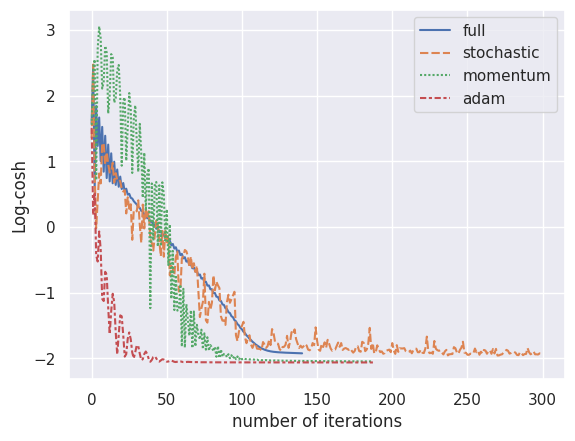

In [ ]:
sns.lineplot(loss_log_cosh).set(xlabel='number of iterations', ylabel='Log-cosh')

Если посмотреть на скорости сходимости, то все в принципе на том же уровне. По ошибке MSE мы особо ничего не выиграли. По значениям Loss_histoty у log-cosha ближе к нулю (порядок -2). Потому я бы сказал, что log_cosh лучше для этой задачи.

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

Я делал бутерброды.

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
lambdas = np.concatenate(([0.0], np.logspace(-1, 1, 6)))
results = []
for lam in lambdas:
    descent_config = {
        'descent_name': "adamax",
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': lam
        }
    }
    regression = LinearRegression(
        descent_config=descent_config,
    )
    regression.fit(X_train, y_train)
    val_pred = regression.predict(X_val)
    results.append(mean_squared_error(y_val, val_pred))
best_adamax = lambdas[results.index(min(results))]

In [ ]:
descent_config = {
    'descent_name': "adamax",
    'kwargs': {
        'dimension': X_train.shape[1],
        'lambda_': best_adamax
    }
}
regression = LinearRegression(descent_config=descent_config,)
regression.fit(X_train, y_train)
val_pred = regression.predict(X_test)
train_pred = regression.predict(X_train)
print(f'Train MSE = {mean_squared_error(train_pred, y_train)}')
print(f'Test MSE = {mean_squared_error(val_pred, y_test)}')
print(f'R^2 test = {r2_score(y_test, val_pred)}')
print(f'R^2 train = {r2_score(y_test, val_pred)}')
print(f'iterations = {regression.descent.lr.iteration}')
loss_ = np.log(regression.loss_history)

Train MSE = 0.3148189439925916
Test MSE = 0.3160375630255145
R^2 test = 0.7460566607514743
R^2 train = 0.7460566607514743
iterations = 129


[Text(0.5, 0, 'number of iterations'), Text(0, 0.5, 'AdaMax')]

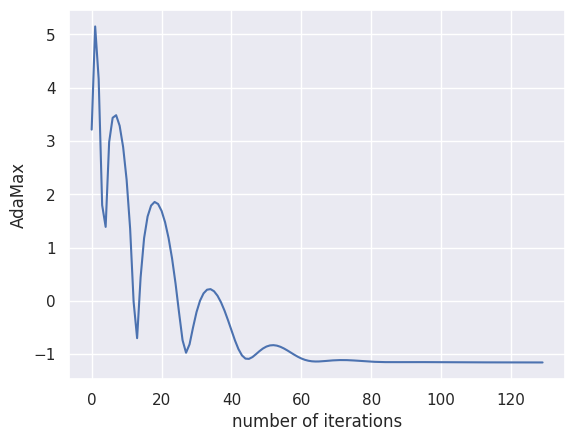

In [ ]:
sns.lineplot(loss_).set(xlabel='number of iterations', ylabel='AdaMax')

Метрики +- те же, число итераций еще меньше чем у Adam, да и выглядит довольно гладко. Если бы что-то еще надо было считать, я бы выбрал его.

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

Снова откинем нормирующую константу, т.к. лень ее таскать.

$MAE \implies d|Xw - y| = sign(Xw - y)d(Xw) \implies ∇w = X^Tsign(Xw - y)$

Заметим, что для хубера мы можем разбить градиент на два случая в зависимоти от того, превосходим мы дельту или нет (когда я пишу в квадрат, имеется ввиду первое транспонированное, умноженное на второе, потому и возникает траснпонирование X)

$Huber < δ \implies d0.5(Xw - y)^2 = (Xw - y)d(Xw) \implies ∇w = X^T(Xw - y), |Xw - y| < δ$
$Huber > δ \implies dδ(|Xw - y| - \frac{δ}{2}) = δsign(Xw - y)d(Xw) \implies ∇w = \delta X^Tsign(Xw - y), |Xw - y| > δ$



Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
lambdas = np.concatenate(([0.0], np.logspace(-1, 1, 6)))

best_lambdas_mae = {}
best_lambdas_huber = {}
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    results = []
    for lam in lambdas:
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_train.shape[1],
                'lambda_': lam,
                'loss_function': LossFunction.MAE
            }
        }
        regression = LinearRegression(descent_config=descent_config)
        regression.fit(X_train, y_train)
        val_pred = regression.predict(X_val)
        results.append(mean_squared_error(y_val, val_pred))
    best_lambdas_mae[descent_name] = lambdas[results.index(min(results))]

In [132]:
from descents import LossFunction
lambdas = np.concatenate(([0.0], np.logspace(-1, 1, 6)))
best_lambdas_huber = {}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    results = []
    for lam in lambdas:
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_train.shape[1],
                'lambda_': lam,
                'loss_function': LossFunction.Huber
            }
        }
        regression = LinearRegression(descent_config=descent_config)
        regression.fit(X_train, y_train)
        val_pred = regression.predict(X_val)
        results.append(mean_squared_error(y_val, val_pred))
    best_lambdas_huber[descent_name] = lambdas[results.index(min(results))]

In [ ]:
loss_mae = {}
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config = {
        'descent_name': descent_name,
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': best_lambdas_mae[descent_name],
            'loss_function': LossFunction.MAE
        }
    }
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train, y_train)
    val_pred = regression.predict(X_test)
    train_pred = regression.predict(X_train)
    methods[descent_name] = [mean_squared_error(y_train, train_pred), mean_squared_error(y_test, val_pred),
                             r2_score(y_test, val_pred), r2_score(y_train, train_pred), regression.descent.lr.iteration,
                              regression.calc_loss(X_train, y_train), regression.calc_loss(X_test, y_test)]
    loss_mae[descent_name] = np.log(regression.loss_history)

In [ ]:
for key, val in methods.items():
    print(f"{key}: train mse {val[0]}, test mse {val[1]}, r2 test{val[2]}, r2 train{val[3]}, iter {val[4]}, train mae{val[5]}, test mae{val[6]}")

full: train mse 0.38181540991269763, test mse 0.384735113262755, r2 test0.6908566233305118, r2 train0.6926970287814925, iter 98, train mae0.43859875421673916, test mae0.44086385818356305
stochastic: train mse 0.3842658320781232, test mse 0.3898805335014433, r2 test0.6867221616395008, r2 train0.6907248139556239, iter 300, train mae0.4456067757233394, test mae0.44976247682912374
momentum: train mse 0.3363818485511414, test mse 0.3390601087587132, r2 test0.7275575238592613, r2 train0.7292640924383444, iter 167, train mae0.4027033204571876, test mae0.40516300813535294
adam: train mse 0.32937312755408515, test mse 0.3323224083948087, r2 test0.7329714186915277, r2 train0.734905040212897, iter 300, train mae0.39748718206914, test mae0.4001755002605433


In [133]:
loss_huber = {}
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config = {
        'descent_name': descent_name,
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': best_lambdas_huber[descent_name],
            'loss_function': LossFunction.Huber
        }
    }
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train, y_train)
    val_pred = regression.predict(X_test)
    train_pred = regression.predict(X_train)
    methods[descent_name] = [mean_squared_error(y_train, train_pred), mean_squared_error(y_test, val_pred),
                             r2_score(y_test, val_pred), r2_score(y_train, train_pred), regression.descent.lr.iteration,
                              regression.calc_loss(X_train, y_train), regression.calc_loss(X_test, y_test)]
    loss_huber[descent_name] = np.log(regression.loss_history)

In [134]:
for key, val in methods.items():
    print(f"{key}: train mse {val[0]}, test mse {val[1]}, r2 test{val[2]}, r2 train{val[3]}, iter {val[4]}, train huber{val[5]}, test huber{val[6]}")

full: train mse 0.3578995710125187, test mse 0.357799064672525, r2 test0.7125003483981276, r2 train0.711945618970371, iter 170, train huber0.15851251790881277, test huber0.15935385259141494
stochastic: train mse 0.3612735478813036, test mse 0.3635435869994784, r2 test0.7078844946112267, r2 train0.7092300839508777, iter 300, train huber0.16147314505169852, test huber0.16289564208651328
momentum: train mse 0.3199247586358899, test mse 0.32046357593266955, r2 test0.742500259143893, r2 train0.7425095311955787, iter 241, train huber0.14230275497480435, test huber0.1433469627206311
adam: train mse 0.31347474881142795, test mse 0.31589367682721875, r2 test0.7461722765704206, r2 train0.7477008019824203, iter 202, train huber0.13963868840590377, test huber0.141413554969646


[Text(0.5, 0, 'number of iterations'), Text(0, 0.5, 'MAE')]

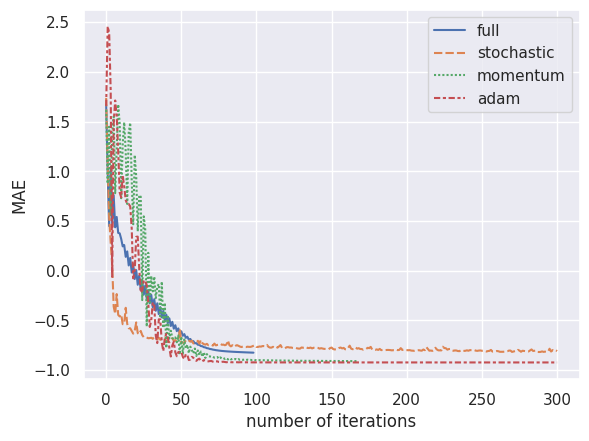

In [ ]:
sns.lineplot(loss_mae).set(xlabel='number of iterations', ylabel='MAE')

[Text(0.5, 0, 'number of iterations'), Text(0, 0.5, 'Huber')]

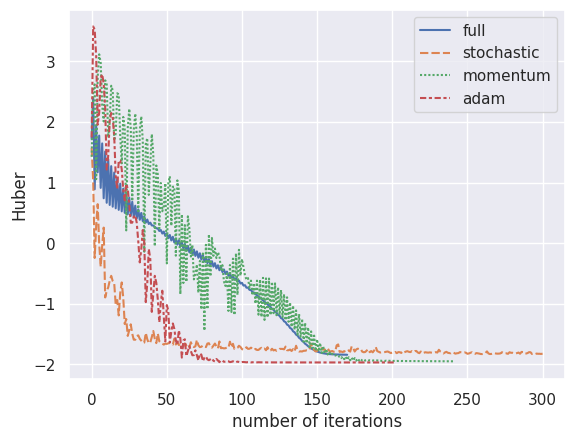

In [135]:
sns.lineplot(loss_huber).set(xlabel='number of iterations', ylabel='Huber')

Как видим, MAE практически не уступает MSE по лоссу, правда количество итераций для него значительно возросло (видно на малых значениях нам не хватает скорости загнаться в ноль и мы продолжаем блуждать между соседними)

Huber же это просто красавец: сходимости еще более приятные (гладкие, быстрые) и видимо даже бьют искомые. Это происходит потому, что мы адекватнее оцениваем ошибку около экстремума (квадратично), что позволяет нам быстрее сходиться.